In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader
from typing import Optional
import pickle


In [ ]:
def load_pickle(file_path):
    try:
        with open(file_path, 'rb') as file:
            data = pickle.load(file)
            print("Pickle file loaded successfully.")
            return data
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
    except Exception as e:
        print(f"Error loading pickle file: {e}")


In [ ]:
file_path = '/content/_S_FC_b1_CIFAR10losses (1).pth'  # loading the files
d_CIF10 = load_pickle(file_path)
d_CIF100 = load_pickle('/content/_S_FC_b50_CIFAR100losses.pth')
d_SVHN =  load_pickle('/content/S_FC_b50_SVHNlosses100.pth')
d_conv= load_pickle('/content/_SCONV_SGD_CIFAR10losses (1).pth')
d_loc = load_pickle('/content/_SCONV_SGD_CIFAR10losses (1).pth')

Pickle file loaded successfully.
Pickle file loaded successfully.
Pickle file loaded successfully.
Pickle file loaded successfully.
Pickle file loaded successfully.


In [ ]:
print(d_conv['layer_nonzeros']['conv1.weight'])

[15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552, 15552]


In [ ]:
CONV = d_conv['layer_nonzeros']['conv1.weight'][0]
LOC = d_conv['layer_nonzeros']['conv1.weight'][0]

In [ ]:
g1_CIF10 = d_CIF10['layer_nonzeros']['fc1.weight']
g1_CIF100 = d_CIF100['layer_nonzeros']['fc1.weight'][:100]
g1_SVHN = d_SVHN['layer_nonzeros']['fc1.weight']

In [ ]:
g2_CIF10 = d_CIF10['layer_nonzeros']['fc2.weight']
g2_CIF100 = d_CIF100['layer_nonzeros']['fc2.weight'][:100]
g2_SVHN = d_SVHN['layer_nonzeros']['fc2.weight']

In [ ]:
g3_CIF10 = d_CIF10['layer_nonzeros']['fc3.weight']
g3_CIF100 = d_CIF100['layer_nonzeros']['fc3.weight'][:100]
g3_SVHN = d_SVHN['layer_nonzeros']['fc3.weight']

In [ ]:
d_conv= load_pickle('/content/_SCONV_SGD_CIFAR10losses (1).pth')


Pickle file loaded successfully.


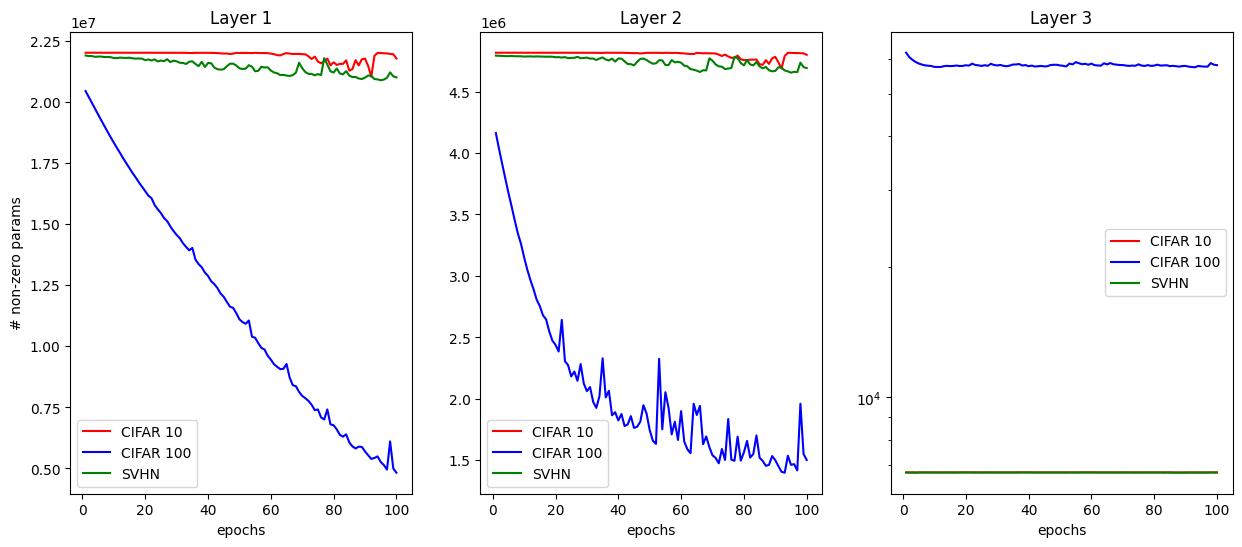

In [ ]:
plt.figure(figsize = [15,6])
plt.subplot(1,3,1)
plt.title('Layer 1')
plt.plot(np.arange(1,101),g1_CIF10 , color  = 'red', label = 'CIFAR 10')
plt.plot(np.arange(1,101),g1_CIF100 , color  = 'blue', label = 'CIFAR 100')
plt.plot(np.arange(1,101),g1_SVHN , color  = 'green', label = 'SVHN')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('# non-zero params')

plt.subplot(1,3,2)
plt.title('Layer 2')
plt.plot(np.arange(1,101),g2_CIF10 , color  = 'red', label = 'CIFAR 10')
plt.plot(np.arange(1,101),g2_CIF100 , color  = 'blue', label = 'CIFAR 100')
plt.plot(np.arange(1,101),g2_SVHN , color  = 'green', label = 'SVHN')
plt.legend()
plt.xlabel('epochs')


plt.subplot(1,3,3)
plt.title('Layer 3')
plt.semilogy(np.arange(1,101),g3_CIF10 , color  = 'red', label = 'CIFAR 10')
plt.semilogy(np.arange(1,101),g3_CIF100 , color  = 'blue', label = 'CIFAR 100')
plt.semilogy(np.arange(1,101),g3_SVHN , color  = 'green', label = 'SVHN')
plt.legend()
plt.xlabel('epochs')

plt.savefig('results-01.png')
